In [1]:
#load packages#

library(RColorBrewer)
library(ggplot2)
library(reticulate)
#library(repr)
BiocManager::install("Bioconductor/AnVIL")

gcsfs <- import("gcsfs")
pd <- import("pandas")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing github package(s) 'Bioconductor/AnVIL'

Skipping install of 'AnVIL' from a github remote, the SHA1 (0ab22d1f) has not changed since last install.
  Use `force = TRUE` to force installation

Old packages: 'ade4', 'ape', 'aplot', 'backports', 'bigrquery', 'bit', 'bit64',
  'broom', 'callr', 'clipr', 'clusterGeneration', 'coda', 'covr', 'cowplot',
  'devtools', 'DT', 'expm', 'ff', 'fs', 'ggplot2', 'ggtree', 'googleAuthR',
  'gplots', 'htmltools', 'htmlwidgets', 'igraph', 'IRkernel', 'isoband',
  'knitr', 'labeling', 'magick', 'MASS', 'mgcv', 'mnormt', 'nlme', 'patchwork',
  'pbdZMQ', 'phytools', 'pkgbuild', 'processx', 'promises', 'ps', 'Rcpp',
  'readr', 'remotes', 'reticulate', 'rmarkdown', 'roxygen2', 'RSQLite',
  'rvest', 'segmented', 'seqinr', 'sp', 'stringi', 'survival', 'tidyr',
  'tinytex', 'usethis', 'withr', 'xfun', 'XML', 'zip'



In [2]:
# load tables with saturation curves #

sample_table1 <- (AnVIL::avtable("sample_set"))
sample_table2 <- (AnVIL::avtable("sampleB"))

# merge tables to have only the columns common between them #
shared_cols<-intersect(names(sample_table1),names(sample_table2))
keep_table1<-which(names(sample_table1) %in% shared_cols)
keep_table2<-which(names(sample_table2) %in% shared_cols)

sample_table_full<-rbind(sample_table1[,keep_table1],sample_table2[,keep_table2])

head(sample_table_full)                            

name,saturation_table,deduplicated_bam,aligned_bam,saturation_plot,subsample_values_out.itemsType,subsample_values_out.items
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
A0001_S121_L002,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/e3e0ca2a-fd87-48ff-b7fc-84d38269e219/call-generate_saturation_info/saturation.tsv,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/e3e0ca2a-fd87-48ff-b7fc-84d38269e219/call-removeDuplicates/deduplicated.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/e3e0ca2a-fd87-48ff-b7fc-84d38269e219/call-filterMultimaps/output.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/e3e0ca2a-fd87-48ff-b7fc-84d38269e219/call-generate_saturation_info/saturation_curve.pdf,AttributeValue,"0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9"
A0008_S140_L002,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/1c9674af-8a37-4cd9-b82d-6d71daa38559/call-generate_saturation_info/saturation.tsv,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/1c9674af-8a37-4cd9-b82d-6d71daa38559/call-removeDuplicates/deduplicated.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/1c9674af-8a37-4cd9-b82d-6d71daa38559/call-filterMultimaps/output.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/1c9674af-8a37-4cd9-b82d-6d71daa38559/call-generate_saturation_info/saturation_curve.pdf,AttributeValue,"0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9"
A0009_S139_L002,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/00cea98e-dc06-4166-9f57-61bba34a15ad/call-generate_saturation_info/saturation.tsv,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/00cea98e-dc06-4166-9f57-61bba34a15ad/call-removeDuplicates/deduplicated.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/00cea98e-dc06-4166-9f57-61bba34a15ad/call-filterMultimaps/output.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/00cea98e-dc06-4166-9f57-61bba34a15ad/call-generate_saturation_info/saturation_curve.pdf,AttributeValue,"0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9"
A0010_S19_L001,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/ec674d8e-f3b4-4f3c-bf7b-df6fa1787ba0/call-generate_saturation_info/saturation.tsv,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/ec674d8e-f3b4-4f3c-bf7b-df6fa1787ba0/call-removeDuplicates/deduplicated.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/ec674d8e-f3b4-4f3c-bf7b-df6fa1787ba0/call-filterMultimaps/output.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/ec674d8e-f3b4-4f3c-bf7b-df6fa1787ba0/call-generate_saturation_info/saturation_curve.pdf,AttributeValue,"0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9"
A0015_S120_L002,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/90f632df-7e26-4e05-a4c1-d300afeb9981/call-generate_saturation_info/saturation.tsv,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/90f632df-7e26-4e05-a4c1-d300afeb9981/call-removeDuplicates/deduplicated.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/90f632df-7e26-4e05-a4c1-d300afeb9981/call-filterMultimaps/output.bam,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/b410b3d6-5c8a-4e53-ad89-246f39da0e6b/umiRnaSeq/90f632df-7e26-4e05-a4c1-d300afeb9981/call-generate_saturation_info/saturation_curve.pdf,AttributeValue,"0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9"
A0022_S185_L002,gs://fc-0abda69f-

In [95]:
# load tables with annotations #

sample_table1 <- (AnVIL::avtable("sample_withbams"))
sample_table2 <- (AnVIL::avtable("sampleB_withbams"))

sample_table1$time<-"pre-covid"
sample_table2$time<-"post-covid"

shared_cols<-intersect(names(sample_table1),names(sample_table2))
keep_table1<-which(names(sample_table1) %in% shared_cols)
keep_table2<-which(names(sample_table2) %in% shared_cols)

annot_table_full<-rbind(sample_table1[,keep_table1],sample_table2[,keep_table2])

head(annot_table_full)



name,r2_fastq,processing_id,cohort,bam_file,tissue,individual,r1_fastq,r3_fastq,AP_aligned_only_reads_bam,AP_read_pairs_aligned,AP_mean_coverage,AP_coverage_plot,AP_reads_provided,AP_bases_aligned,AP_reads_aligned,AP_coverage_tsv,time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A0001_S121_L002,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0001_S121_L002_R2_001.fastq.gz,A0001,D006,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/780f82f8-4cfc-4b98-85ad-ca9c1e997ac9/call-FastqToUBAM/A0001_S121_L002.bam,Spleen,RA1803,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0001_S121_L002_R1_001.fastq.gz,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0001_S121_L002_R3_001.fastq.gz,NA,NA,NA,NA,NA,NA,NA,NA,pre-covid
A0008_S140_L002,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0008_S140_L002_R2_001.fastq.gz,A0008,D006,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/104fc250-2081-4b8d-9c4f-253d75a2a3a0/call-FastqToUBAM/A0008_S140_L002.bam,Lymph node,RA1803,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0008_S140_L002_R1_001.fastq.gz,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0008_S140_L002_R3_001.fastq.gz,NA,NA,NA,NA,NA,NA,NA,NA,pre-covid
A0009_S139_L002,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0009_S139_L002_R2_001.fastq.gz,A0009,D006,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/ec95e522-4158-40fa-b1d2-3206d62c9e41/call-FastqToUBAM/A0009_S139_L002.bam,Lymph node,RA1803,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0009_S139_L002_R1_001.fastq.gz,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0009_S139_L002_R3_001.fastq.gz,NA,NA,NA,NA,NA,NA,NA,NA,pre-covid
A0010_S19_L001,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0010_S19_L001_R2_001.fastq.gz,A0010,D006,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/e1a85b61-059f-4bd4-b455-c28f006ac063/call-FastqToUBAM/A0010_S19_L001.bam,Lymph node,RA1803,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0010_S19_L001_R1_001.fastq.gz,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0010_S19_L001_R3_001.fastq.gz,NA,NA,NA,NA,NA,NA,NA,NA,pre-covid
A0015_S120_L002,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0015_S120_L002_R2_001.fastq.gz,A0015,D004,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/07cb29fb-0ed0-4f49-b7c6-c2b8627dd022/call-FastqToUBAM/A0015_S120_L002.bam,Spleen,RA0850,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0015_S120_L002_R1_001.fastq.gz,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0015_S120_L002_R3_001.fastq.gz,NA,NA,NA,NA,NA,NA,NA,NA,pre-covid
A0022_S185_L002,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0022_S185_L002_R2_001.fastq.gz,A0022,D004,gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/1e6ff689-2b51-483e-94bf-53ce68414813/fastq_to_ubam/b72af177-a957-4244-86c6-03673381fe3d/call-FastqToUBAM/A0022_S185_L002.bam,Lymph node,RA0850,gs://sabeti-txnomics/nbarkas/bulk_rnaseq/bcl2fastq_demux_fastq/200320_SL-NVP_0201_AHM3MKDMXX/fastq/A0022_S185_L002

In [98]:
# merge tables #

# remove L00X from names #
sample_table_full$name<-sapply(sample_table_full$name,function(x) strsplit(x,"_L0")[[1]][1])
annot_table_full$name<-sapply(annot_table_full$name,function(x) strsplit(x,"_L0")[[1]][1])
                               
table_full<-merge(sample_table_full[,1:2], annot_table_full[,c(1,3,4,6,7,18)],by='name')


In [111]:
# import annotation files and annotate #

# read in first saturation file #
saturation_files_merged<-pd$read_csv(table_full$saturation_table[1])
saturation_files_merged$tissue<-table_full$tissue[1]
saturation_files_merged$individual<-table_full$individual[1]
saturation_files_merged$processing_id<-paste(table_full$processing_id[1],1,sep="_")
saturation_files_merged$sample<-table_full$processing_id[1]
saturation_files_merged$time<-table_full$time[1]

# read in all subsequent files, and merge
for (i in 2:nrow(table_full)) { # nrow(table_full)
    if (!(is.na(table_full$saturation_table[i]))) {
        saturation_file<-pd$read_csv(table_full$saturation_table[i])
        saturation_file$tissue<-table_full$tissue[i]
        saturation_file$individual<-table_full$individual[i]
        saturation_file$processing_id<-paste(table_full$processing_id[i],i,sep="_")
        saturation_file$sample<-table_full$processing_id[i]
        saturation_file$time<-table_full$time[i]
        
        saturation_files_merged<-rbind(saturation_files_merged,saturation_file)
   }
}
    
dim(saturation_files_merged)

names(saturation_files_merged)[1]<-"s"


[1] 29664     8

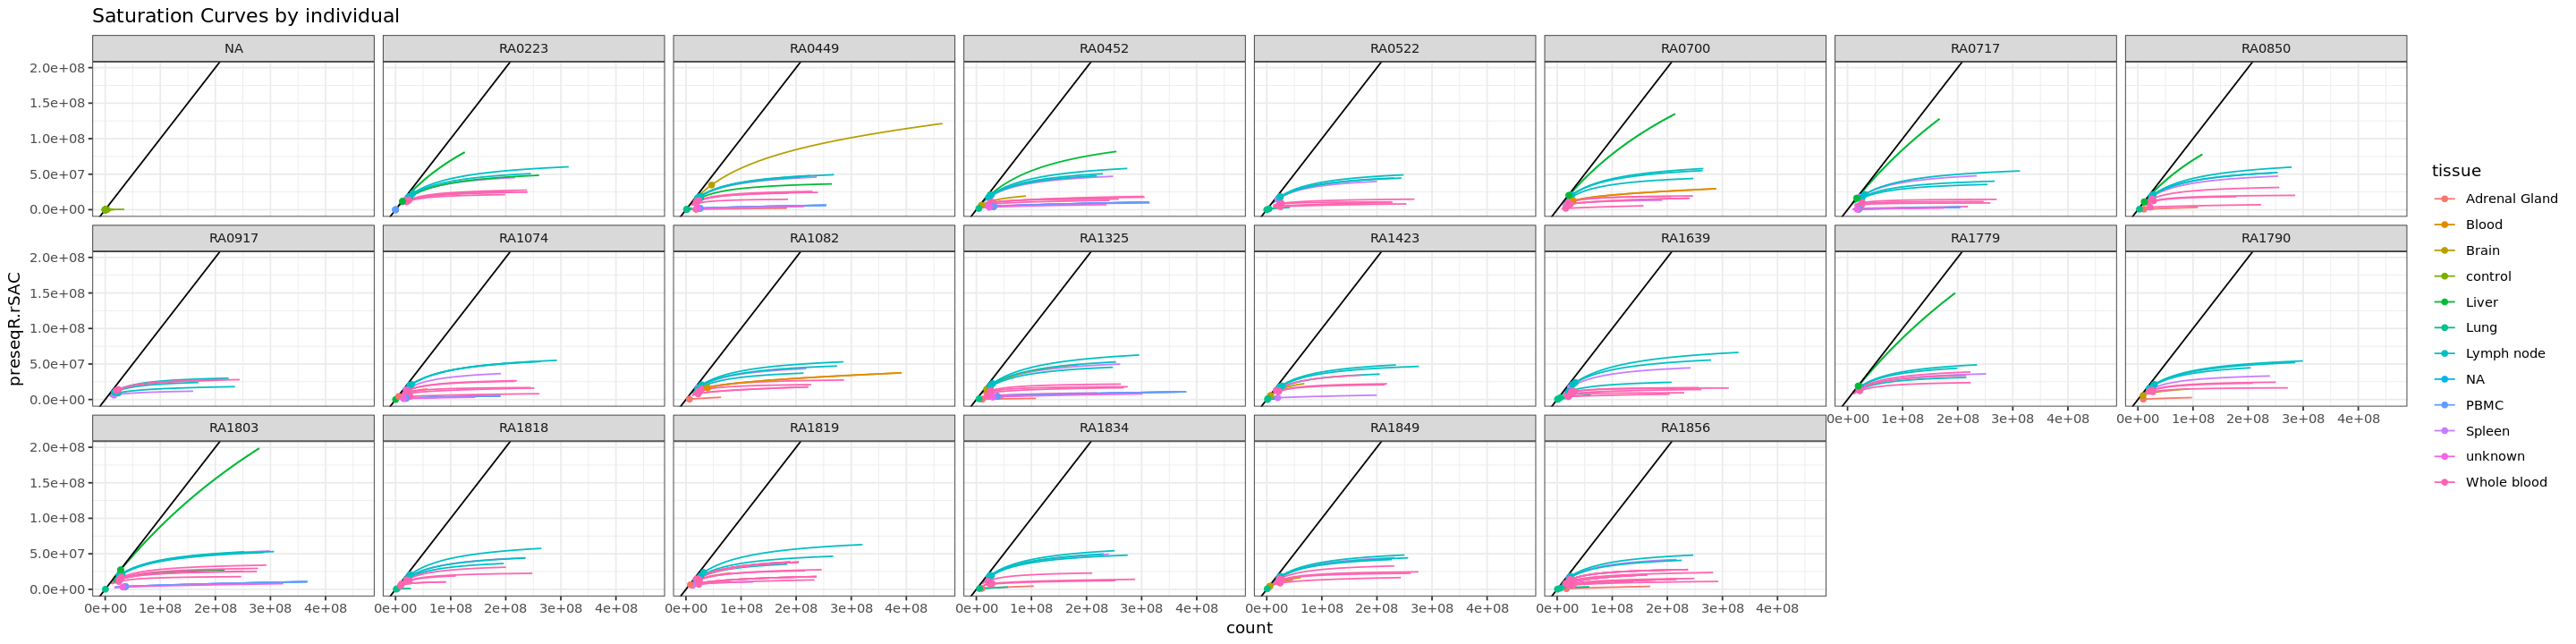

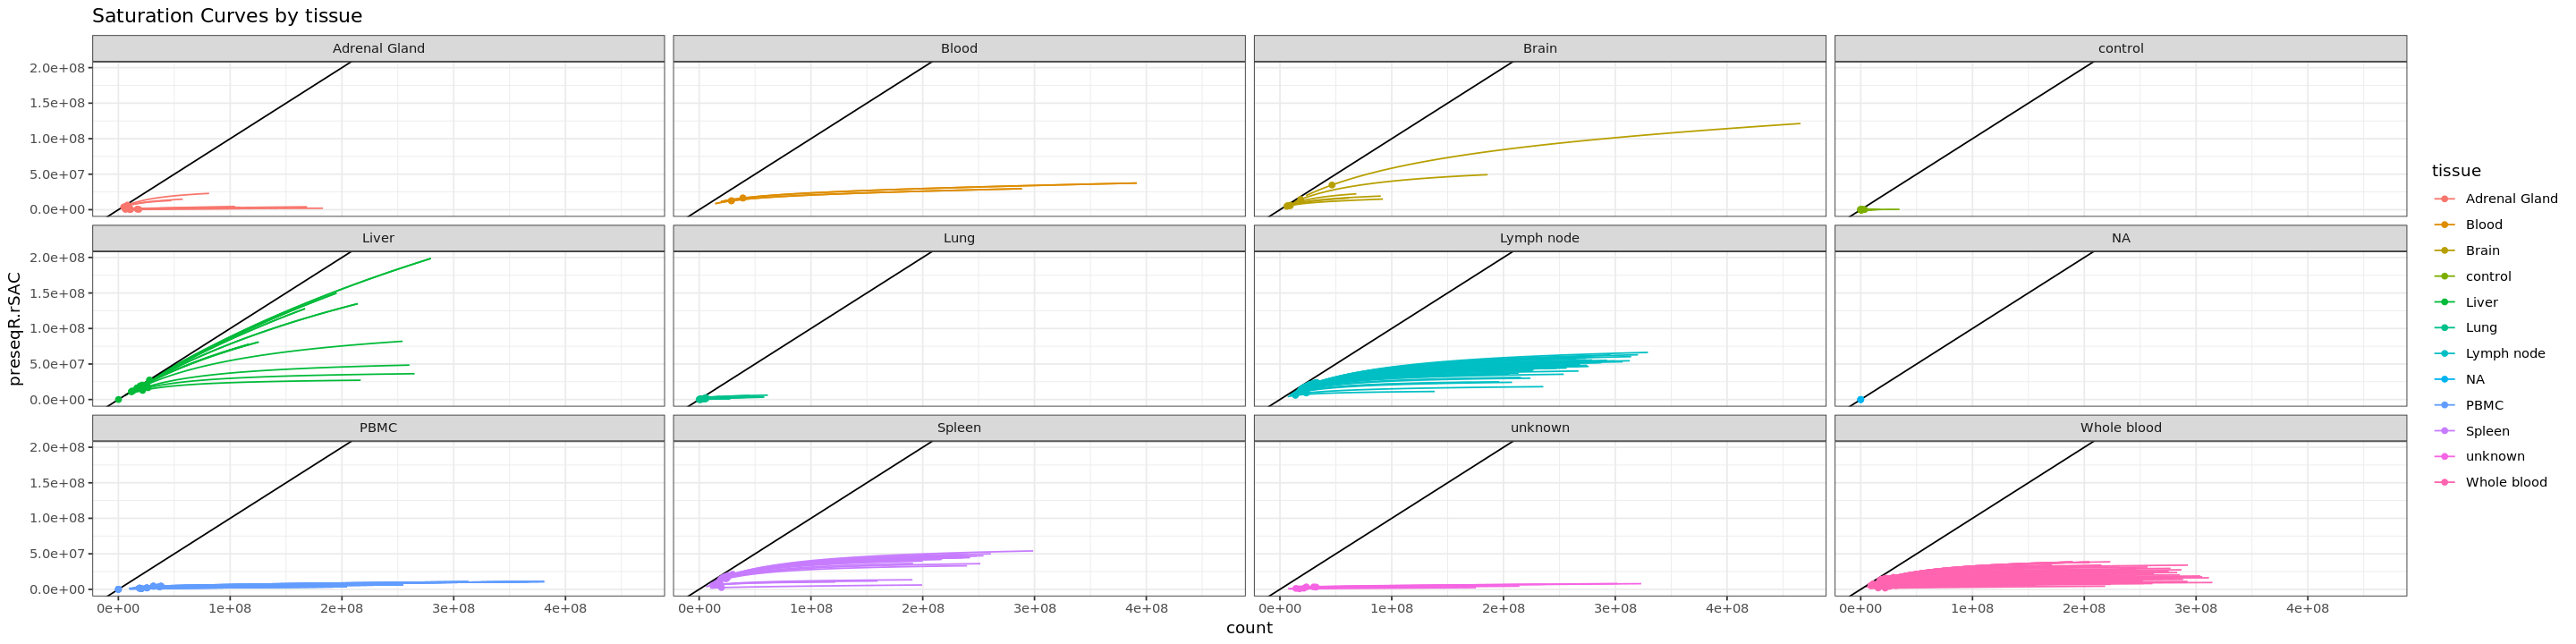

In [93]:
options(repr.plot.width=24,repr.plot.height=6)

p <- ggplot(saturation_files_merged, aes(x=count, y=preseqR.rSAC, group=processing_id, color=tissue)) + 
    geom_line() + geom_abline(intercept = 0, slope=1) + 
    geom_point(subset(saturation_files_merged,s==6), mapping=aes(x=count, y = preseqR.rSAC, color=tissue), inherit.aes = FALSE) +
    scale_x_continuous(limits=c(0,max(saturation_files_merged$count))) + 
    scale_y_continuous(limits=c(0,max(saturation_files_merged$preseqR.rSAC))) +
    facet_wrap(~individual, nrow=3) +
    ggtitle('Saturation Curves by individual') +
  theme_bw()
p

p <- ggplot(saturation_files_merged, aes(x=count, y=preseqR.rSAC, group=processing_id, color=tissue)) + 
    geom_line() + geom_abline(intercept = 0, slope=1) + 
    geom_point(subset(saturation_files_merged,s==6), mapping=aes(x=count, y = preseqR.rSAC, color=tissue), inherit.aes = FALSE) +
    scale_x_continuous(limits=c(0,max(saturation_files_merged$count))) + 
    scale_y_continuous(limits=c(0,max(saturation_files_merged$preseqR.rSAC))) +
    facet_wrap(~tissue, nrow=3) +
    ggtitle('Saturation Curves by tissue') +
  theme_bw()
p




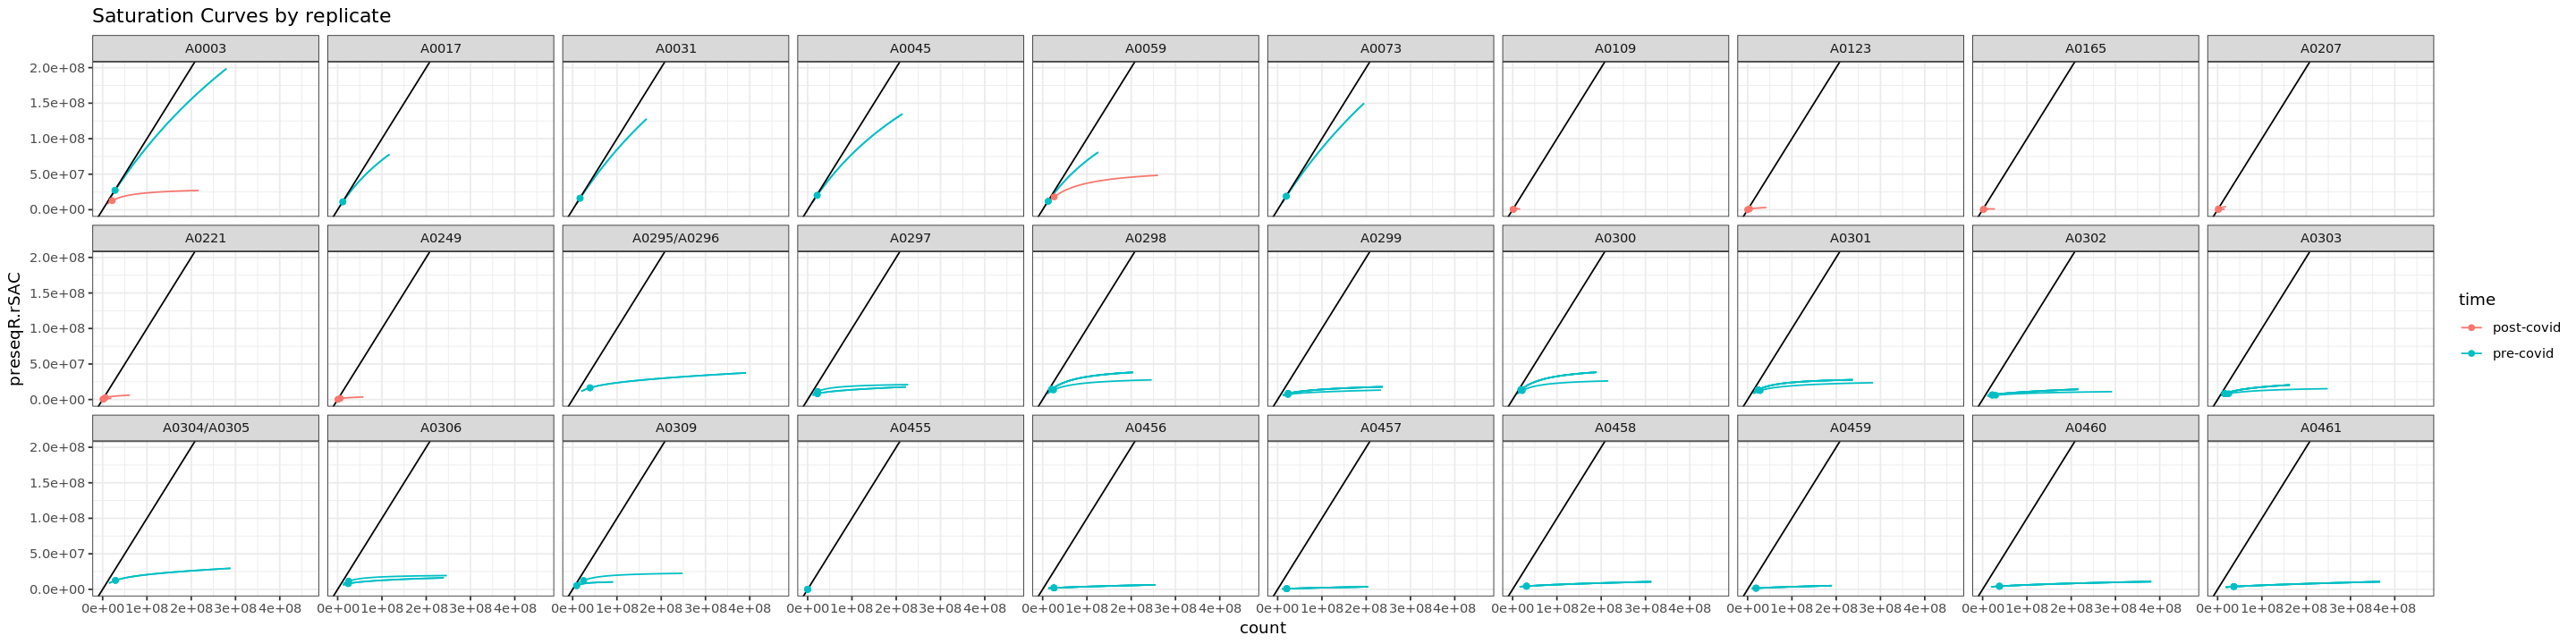

In [115]:
# analysis of second run - tech dev comparisons #

# which samples are in both sample tables #
attempts<-table(table_full$processing_id)
attempts<-attempts[grep("A0",names(attempts))]
repeats<-names(attempts)[attempts>1]

saturation_files_subset<-saturation_files_merged[saturation_files_merged$sample %in% repeats,]

p <- ggplot(saturation_files_subset, aes(x=count, y=preseqR.rSAC, group=processing_id, color=time)) + 
    geom_line() + geom_abline(intercept = 0, slope=1) + 
    geom_point(subset(saturation_files_subset,s==6), mapping=aes(x=count, y = preseqR.rSAC, color=time), inherit.aes = FALSE) +
    scale_x_continuous(limits=c(0,max(saturation_files_merged$count))) + 
    scale_y_continuous(limits=c(0,max(saturation_files_merged$preseqR.rSAC))) +
    facet_wrap(~sample, nrow=3) +
    ggtitle('Saturation Curves by replicate') +
  theme_bw()
p



#table_full[table_full$processing_id %in% done_twice,]

# 1. Re-extracts

# 2. xxx


In [ ]:
# read in lab master sheet #

master_file_path<-"gs://fc-0abda69f-0aed-4d4c-8f5b-482e69f4b703/data/lab_data/Master_Sample-Keys_TotalRNA_EBOV-201028.tsv"
master_table<-pd$read_csv(master_file_path,sep="\t")
head(master_table)
names(master_table)

# make some corrections to master table #
master_table$ID.Individual<-gsub("RA0552","RA0522",master_table$ID.Individual) # typo
master_table$ID.Cohort<-gsub("[?]","",master_table$ID.Cohort) # typo
master_table$ID.Cohort<-gsub("D-28","D-28/30",master_table$ID.Cohort) # merge D28 and D30
master_table$ID.Cohort<-gsub("D-30","D-28/30",master_table$ID.Cohort) # merge D28 and D30
master_table$ID.Cohort<-gsub("D-4","D-4/14",master_table$ID.Cohort) # merge D28 and D30
master_table$ID.Cohort<-gsub("D-04","D-4/14",master_table$ID.Cohort) # merge D28 and D30
master_table$ID.Cohort<-gsub("D-14","D-4/14",master_table$ID.Cohort) # merge D28 and D30

# swap 1819 and 1074 tissues #
solid_tissues<-c('Spleen','Kidney','Liver','Adrenal Gland','Brain','Sex Organ','Lymph node','Lung','Skin')
fluids<-c('Whole blood','CSF','Serum','PBMC')
should_be_1074<-which(master_table$ID.Individual=="RA1819" & master_table$Tissue %in% solid_tissues)
should_be_1819<-which(master_table$ID.Individual=="RA1074" & master_table$Tissue %in% solid_tissues)

master_table$ID.Individual<-as.character(master_table$ID.Individual)
master_table$ID.Cohort<-as.character(master_table$ID.Cohort)
master_table$ID.Individual[should_be_1074]<-"RA1074"
master_table$ID.Cohort[should_be_1074]<-"D006"

master_table$ID.Individual[should_be_1819]<-"RA1819"
master_table$ID.Cohort[should_be_1819]<-"D000"

# make a more fine-grained tissue variable #
master_table$Tissue[master_table$Tissue=="CSF" & master_table$ID.Cohort=="NaN"]<-"CSF-BL"

tissue_resolved<-sapply(master_table$Biosample,function(x) strsplit(x,"_")[[1]][2]) # remove individual ID
tissue_resolved<-sapply(tissue_resolved,function(x) strsplit(x,"-D")[[1]][1]) # remove day or other details
master_table$TissueDetail<-tissue_resolved

In [ ]:
# look at saturation curves as function of LC concentration and RIN #